In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)

In [2]:
all_AVA_muts = pd.read_pickle("../data/ava/4_10_with_uniq_midpts.pkl")
print(len(all_AVA_muts))
all_AVA_muts.head()

3921


,index,exp,ale,flask,isolate,tech_rep,presence,Position,Mutation Type,Sequence Change,Details,mutation target annotation,Reference Seq,sample,sample type,exp ALE,coding,range,gene RegulonDB ID,genetic features,oriC,pseudogene,TFBS,promoter,RBS,attenuator terminator,terminator,genetic,genomic features,genetic feature links,operons,operon links,regulators,regulator links,pathways,pathway links,COGs,COG links,imodulons,imodulon links,EC numbers,EC number links,products,product links,temperature,carbon-source,supplement,strain-description,taxonomy-id,base-media,nitrogen-source,phosphorous-source,sulfur-source,calcium-source
0,9,42C,1,124,1,1,1.0,702352,DEL,Δ21 bp,coding (380‑400/1149 nt),nagA,NaN,1 124 1 1,clone,42C 1,True,"(702352, 702372)",{ECK120000625},"[{'name': 'nagA', 'RegulonDB ID': 'ECK12000062...",False,False,{},{},{},{},{},True,"[{'name': 'nagA', 'RegulonDB ID': 'ECK12000062...",{'ECK120000625': ['ECK120000625']},"[{'name': 'nagBAC-umpH', 'RegulonDB ID': 'ECK1...",{'ECK125162049': ['ECK120000625']},"[{'name': 'PhoP', 'significantly associated co...","{'NagC': ['ECK125162049'], 'CRP': ['ECK1251620...","[{'name': 'Galactose metabolism', 'significant...","{'Galactose metabolism': ['ECK125162049'], 'Am...",[{'name': 'Carbohydrate transport and metaboli...,{'Carbohydrate transport and metabolism': ['EC...,"[{'name': 'NagC/TyrR', 'significantly associat...",{'NagC/TyrR': ['nagBAC-umpH']},"[{'name': '3.5.1.25', 'significantly associate...","{'3.5.1.25': ['ECK125162049', 'ECK125162049']}",[{'name': 'N-acetylglucosamine-6-phosphate dea...,{'N-acetylglucosamine-6-phosphate deacetylase ...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
1,10,42C,1,124,1,1,1.0,1308318,SNP,G→C,R110G (CGT→GGT),clsA,NaN,1 124 1 1,clone,42C 1,True,"(1308318, 1308318)",{ECK120001556},"[{'name': 'clsA', 'RegulonDB ID': 'ECK12000155...",False,False,{},{},{},{},{},True,"[{'name': 'clsA', 'RegulonDB ID': 'ECK12000155...",{'ECK120001556': ['ECK120001556']},"[{'name': 'clsA-yciU', 'RegulonDB ID': 'ECK125...",{'ECK125147415': ['ECK120001556']},[],{},[],{},[{'name': 'Lipid transport and metabolism'}],{'Lipid transport and metabolism': ['ECK125147...,[],{},[],{},[],{},42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
2,11,42C,1,124,1,1,1.0,3815859,DEL,Δ82 bp,None,rph,NaN,1 124 1 1,clone,42C 1,True,"(3815859, 3815940)",{ECK120000854},"[{'name': 'rph', 'RegulonDB ID': 'ECK120000854...",False,False,{},{},{},{ECK125144791},{},True,"[{'name': 'rph-pyrE attenuator terminator', 'R...","{'ECK120000854': ['ECK120000854'], 'ECK1200007...","[{'name': 'rph-pyrE', 'RegulonDB ID': 'ECK1200...","{'ECK120014627': ['ECK120000854', 'ECK12000079...",[],{},"[{'name': 'Pyrimidine metabolism', 'significan...","{'Pyrimidine metabolism': ['ECK120014627'], 'D...",[{'name': 'Nucleotide transport and metabolism'}],{'Nucleotide transport and metabolism': ['ECK1...,"[{'name': 'purR-KO', 'significantly associated...","{'purR-KO': ['rph-pyrE', 'rph-pyrE']}","[{'name': '2.4.2.10', 'significantly associate...","{'2.4.2.10': ['ECK120014627', 'ECK120014627']}",[{'name': 'Orotate phosphoribosyltransferase (...,{'Orotate phosphoribosyltransferase (EC 2.4.2....,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
3,12,42C,1,124,1,1,1.0,4187550,SNP,C→T,A734V (GCG→GTG),rpoC,NaN,1 124 1 1,clone,42C 1,True,"(4187550, 4187550)",{ECK120000886},"[{'name': 'rpoC', 'RegulonDB ID': 'ECK12000088...",False,False,{},{},{},{},{},True,"[{'name': 'rpoC', 'RegulonDB ID': 'ECK12000088...",{'ECK120000886': ['ECK120000886']},"[{'name': 'rplKAJL-rpoBC', 'RegulonDB ID': 'EC...",{'ECK120016992': ['ECK120000886']},[],{},"[{'name': 'Purine metabolism', 'significantly ...","{'Purine metabolism': ['ECK120016992'], 'Pyrim...",[{'name': 'Transcription'}],{'Transcription': ['ECK120016992']},"[{'name': 'translation', 'significantl

In [3]:
meta_muts = pd.DataFrame()
for _, r in all_AVA_muts.iterrows():  # Using genomic features ensures I get any large deletions that involved cyaA
    for geno_feat in r["genomic features"]:
        if geno_feat["name"]=="cyaA":
            meta_muts = meta_muts.append(r, ignore_index=True)
            break
display(len(meta_muts), meta_muts.head())

30

,COG links,COGs,Details,EC number links,EC numbers,Mutation Type,Position,RBS,Reference Seq,Sequence Change,TFBS,ale,attenuator terminator,base-media,calcium-source,carbon-source,coding,exp,exp ALE,flask,gene RegulonDB ID,genetic,genetic feature links,genetic features,genomic features,imodulon links,imodulons,index,isolate,mutation target annotation,nitrogen-source,operon links,operons,oriC,pathway links,pathways,phosphorous-source,presence,product links,products,promoter,pseudogene,range,regulator links,regulators,sample,sample type,strain-description,sulfur-source,supplement,taxonomy-id,tech_rep,temperature,terminator
0,{'Nucleotide transport and metabolism': ['ECK1...,[{'name': 'Nucleotide transport and metabolism'}],R665S (CGT→AGT),{'4.6.1.1': ['ECK120014835']},"[{'name': '4.6.1.1', 'significantly associated...",SNP,3993145.0,{},NC_000913,C→A,{},1.0,{},M9,CaCl2(0.1),glycerol(2.5),1.0,GYD,GYD 1,280.0,{ECK120000166},1.0,{'ECK120000166': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...","[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...",{},[],14714,0.0,cyaA,NH4Cl(1),{'ECK120014835': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12001483...",0.0,{'Purine metabolism': ['ECK120014835']},"[{'name': 'Purine metabolism', 'significantly ...",KH2PO4(3) Na2HPO4(6.8),1.00,{'Adenylate cyclase (EC 4.6.1.1)': ['ECK120014...,"[{'name': 'Adenylate cyclase (EC 4.6.1.1)', 's...",{},0.0,"(3993145, 3993145)",{'CRP': ['ECK120014835']},"[{'name': 'CRP', 'significantly associated con...",1 280 0 1,population,WT,MgSO4(0.24),NaCl(0.5g/L) trace elements,511145,1.0,30 celsius,{}
1,{'Nucleotide transport and metabolism': ['ECK1...,[{'name': 'Nucleotide transport and metabolism'}],S478I (AGC→ATC),{'4.6.1.1': ['ECK120014835']},"[{'name': '4.6.1.1', 'significantly associated...",SNP,3992585.0,{},NC_000913,G→T,{},3.0,{},M9,CaCl2(0.1),glycerol(2.5),1.0,GYD,GYD 3,176.0,{ECK120000166},1.0,{'ECK120000166': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...","[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...",{},[],14851,0.0,cyaA,NH4Cl(1),{'ECK120014835': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12001483...",0.0,{'Purine metabolism': ['ECK120014835']},"[{'name': 'Purine metabolism', 'significantly ...",KH2PO4(3) Na2HPO4(6.8),0.86,{'Adenylate cyclase (EC 4.6.1.1)': ['ECK120014...,"[{'name': 'Adenylate cyclase (EC 4.6.1.1)', 's...",{},0.0,"(3992585, 3992585)",{'CRP': ['ECK120014835']},"[{'name': 'CRP', 'significantly associated con...",3 176 0 1,population,WT,MgSO4(0.24),NaCl(0.5g/L) trace elements,511145,1.0,30 celsius,{}
2,{'Nucleotide transport and metabolism': ['ECK1...,[{'name': 'Nucleotide transport and metabolism'}],coding (1553‑1556/2547 nt),{'4.6.1.1': ['ECK120014835']},"[{'name': '4.6.1.1', 'significantly associated...",MOB,3992705.0,{},NC_000913,IS5 (+) +4 bp,{},4.0,{},M9,CaCl2(0.1),glycerol(2.5),1.0,GYD,GYD 4,195.0,{ECK120000166},1.0,{'ECK120000166': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...","[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...",{},[],14895,0.0,cyaA,NH4Cl(1),{'ECK120014835': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12001483...",0.0,{'Purine metabolism': ['ECK120014835']},"[{'name': 'Purine metabolism', 'significantly ...",KH2PO4(3) Na2HPO4(6.8),1.00,{'Adenylate cyclase (EC 4.6.1.1)': ['ECK120014...,"[{'name': 'Adenylate cyclase (EC 4.6.1.1)', 's...",{},0.0,"(3992705, 3992705)",{'CRP': ['ECK120014835']},"[{'name': 'CRP', 'significantly associated con...",4 195 0 1,population,WT,MgSO4(0.24),NaCl(0.5g/L) trace elements,511145,1.0,30 celsius,{}
3,{'Nucleotide transport and metabolism': ['ECK1...,[{'name': 'Nucleotide transport and metabolism'}],R665S (CGT→AGT),{'4.6.1.1': ['ECK120014835']},"[{'name': '4.6.1.1', 'significantly associated...",SNP,3993145.0,{},NC_000913,C→A,{},5.0,{},M9,CaCl2(0.1),glycerol(2.5),1.0,GYD,GYD 5,216.0,{ECK120000166},1.0,{'ECK120000166': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...","

In [4]:
# # Adding Herring 2006 mutations manually
# Herring_cyaA_mut_d = {
#     "exp": "Herring 2006",
#     "Mutation Type": "DEL",
#     "coding": 1,
#     "Details": "coding (2283‑2287/2547 nt)",
#     "Sequence Change": "Δ5 bp",
#     "mutation target annotation": "cyA"
# }
# meta_muts = meta_muts.append(Herring_cyaA_mut_d, ignore_index=True)

In [5]:
from Bio import SeqIO


recs = [rec for rec in SeqIO.parse("../data/NC_000913_3.gb", "genbank")]

mob_sizes = dict()

for rec in recs:
    feats = [feat for feat in rec.features if feat.type == "mobile_element"]
    for feat in feats:
        for annot in feat.qualifiers["mobile_element_type"]:
            mob_name = annot.replace("insertion sequence:",'')
            if mob_name[-1].isdigit() == False:  # Removing annotations describing separate instances of a MOB.
                mob_name = mob_name[:-1]
            mob_size = len(feat.location)
            if mob_name not in mob_sizes.keys():  # Assuming that all MOBs have the same length.
                mob_sizes[mob_name] = mob_size
mob_sizes

{'IS186': 1345,
 'IS1': 768,
 'IS911': 335,
 'IS30': 1221,
 'IS5': 1195,
 'IS': 312,
 'IS3': 1255,
 'IS2': 1331,
 'IS609': 1748,
 'IS5L': 1195,
 'IS150': 1443,
 'IS4': 1426,
 'IS600': 327}

In [6]:
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from mutil.mut import get_mut_size, get_mob_size, is_genetic_mut, is_coding_mut, predict_mutation_effect_on_feature, get_SNP_aa_pos, get_DEL_INS_MOB_aa_start_pos, get_DEL_AA_range


meta_muts["genetic"] = meta_muts["Details"].apply(is_genetic_mut)
meta_muts["coding"] = meta_muts["Details"].apply(is_coding_mut)
meta_muts["mutation size"] = meta_muts.apply(get_mut_size, axis=1)  # get_mut_size currently doesn't return MOB mut sizes. Isn't something currently necessary.

# TODO: integrate MOB size logic into get_mut_size
meta_muts["mutation size"] = meta_muts.apply(lambda r: get_mob_size(r["Sequence Change"], mob_sizes) if r["Mutation Type"] == "MOB" else r["mutation size"], axis=1)

In [7]:
def _set_geno_feat_effect(mut):
    for gf in mut["genomic features"]:
        gf["predicted mutation effect"] = predict_mutation_effect_on_feature(mut, gf)

meta_muts.apply(lambda m: _set_geno_feat_effect(m), axis=1)

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
22    None
23    None
24    None
25    None
26    None
27    None
28    None
29    None
dtype: object

## Setting mutation feature effects onto whole mutation since currently only interested in mutations to a gene.
Future implementations of this workflow that intend to be generalized across multiple feature types should set mutation effects into the genomic feature dictionaries in the "genomic features" column like have done with the "predict_mutation_effect_on_feature" function.

In [8]:
def _is_coding_disrupt(geno_feats, gene_name):
    is_gene_trunc = False
    for gf in geno_feats:
        if (gf["name"] == gene_name) & (gf['predicted mutation effect'] == 'truncation'):
            
            is_gene_trunc = True
            break
    return is_gene_trunc


meta_muts["coding disrupt"] = meta_muts["genomic features"].apply(lambda gfs: _is_coding_disrupt(gfs, "cyaA"))

In [9]:
def _get_SNP_AA_range(mut_details_str):
    SNP_AA_range = ()
    AA_pos = get_SNP_aa_pos(mut_details_str)
    SNP_AA_range = (AA_pos, AA_pos)
    return SNP_AA_range


meta_muts["AA range"] = None
meta_muts["AA range"] = meta_muts.apply(lambda r: _get_SNP_AA_range(r["Details"]) if ((r["Mutation Type"] == "SNP") & (r["coding"]==1)) else r["AA range"], axis=1)
meta_muts[meta_muts["Mutation Type"].isin(["SNP"])].head()

,COG links,COGs,Details,EC number links,EC numbers,Mutation Type,Position,RBS,Reference Seq,Sequence Change,TFBS,ale,attenuator terminator,base-media,calcium-source,carbon-source,coding,exp,exp ALE,flask,gene RegulonDB ID,genetic,genetic feature links,genetic features,genomic features,imodulon links,imodulons,index,isolate,mutation target annotation,nitrogen-source,operon links,operons,oriC,pathway links,pathways,phosphorous-source,presence,product links,products,promoter,pseudogene,range,regulator links,regulators,sample,sample type,strain-description,sulfur-source,supplement,taxonomy-id,tech_rep,temperature,terminator,mutation size,coding disrupt,AA range
0,{'Nucleotide transport and metabolism': ['ECK1...,[{'name': 'Nucleotide transport and metabolism'}],R665S (CGT→AGT),{'4.6.1.1': ['ECK120014835']},"[{'name': '4.6.1.1', 'significantly associated...",SNP,3993145.0,{},NC_000913,C→A,{},1.0,{},M9,CaCl2(0.1),glycerol(2.5),True,GYD,GYD 1,280.0,{ECK120000166},True,{'ECK120000166': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...","[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...",{},[],14714,0.0,cyaA,NH4Cl(1),{'ECK120014835': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12001483...",0.0,{'Purine metabolism': ['ECK120014835']},"[{'name': 'Purine metabolism', 'significantly ...",KH2PO4(3) Na2HPO4(6.8),1.00,{'Adenylate cyclase (EC 4.6.1.1)': ['ECK120014...,"[{'name': 'Adenylate cyclase (EC 4.6.1.1)', 's...",{},0.0,"(3993145, 3993145)",{'CRP': ['ECK120014835']},"[{'name': 'CRP', 'significantly associated con...",1 280 0 1,population,WT,MgSO4(0.24),NaCl(0.5g/L) trace elements,511145,1.0,30 celsius,{},1,False,"(665, 665)"
1,{'Nucleotide transport and metabolism': ['ECK1...,[{'name': 'Nucleotide transport and metabolism'}],S478I (AGC→ATC),{'4.6.1.1': ['ECK120014835']},"[{'name': '4.6.1.1', 'significantly associated...",SNP,3992585.0,{},NC_000913,G→T,{},3.0,{},M9,CaCl2(0.1),glycerol(2.5),True,GYD,GYD 3,176.0,{ECK120000166},True,{'ECK120000166': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...","[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...",{},[],14851,0.0,cyaA,NH4Cl(1),{'ECK120014835': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12001483...",0.0,{'Purine metabolism': ['ECK120014835']},"[{'name': 'Purine metabolism', 'significantly ...",KH2PO4(3) Na2HPO4(6.8),0.86,{'Adenylate cyclase (EC 4.6.1.1)': ['ECK120014...,"[{'name': 'Adenylate cyclase (EC 4.6.1.1)', 's...",{},0.0,"(3992585, 3992585)",{'CRP': ['ECK120014835']},"[{'name': 'CRP', 'significantly associated con...",3 176 0 1,population,WT,MgSO4(0.24),NaCl(0.5g/L) trace elements,511145,1.0,30 celsius,{},1,False,"(478, 478)"
3,{'Nucleotide transport and metabolism': ['ECK1...,[{'name': 'Nucleotide transport and metabolism'}],R665S (CGT→AGT),{'4.6.1.1': ['ECK120014835']},"[{'name': '4.6.1.1', 'significantly associated...",SNP,3993145.0,{},NC_000913,C→A,{},5.0,{},M9,CaCl2(0.1),glycerol(2.5),True,GYD,GYD 5,216.0,{ECK120000166},True,{'ECK120000166': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...","[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...",{},[],14906,0.0,cyaA,NH4Cl(1),{'ECK120014835': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12001483...",0.0,{'Purine metabolism': ['ECK120014835']},"[{'name': 'Purine metabolism', 'significantly ...",KH2PO4(3) Na2HPO4(6.8),1.00,{'Adenylate cyclase (EC 4.6.1.1)': ['ECK120014...,"[{'name': 'Adenylate cyclase (EC 4.6.1.1)', 's...",{},0.0,"(3993145, 3993145)",{'CRP': ['ECK120014835']},"[{'name': 'CRP', 'significantly associated con...",5 216 0 1,population,WT,MgSO4(0.24),NaCl(0.5g/L) trace elements,511145,1.0,30 celsius,{},1,False,"(665, 665)"
4,{'Nucleotide transport and metabolism': ['ECK1...,[{'name': 'Nucleotide transport and metabolism'}],D231V (GAT→GTT),{'4.6.1.1': ['ECK120014835']},"[{'name': '4.6.1.1', 'significantly associated...",SNP,3991844.0,{},NC_000913,A→T,{},6.0,{},M9,CaCl2(0.1),glycerol(2.5),True,GYD,GYD 6,187.0,{ECK120000166},True,

In [10]:
meta_muts["AA range"] = meta_muts.apply(lambda r: get_DEL_AA_range(r["Details"]) if ((r["Mutation Type"] == "DEL") & (r["coding"]==1)) else r["AA range"], axis=1)
meta_muts[meta_muts["Mutation Type"].isin(["DEL"])].head()

,COG links,COGs,Details,EC number links,EC numbers,Mutation Type,Position,RBS,Reference Seq,Sequence Change,TFBS,ale,attenuator terminator,base-media,calcium-source,carbon-source,coding,exp,exp ALE,flask,gene RegulonDB ID,genetic,genetic feature links,genetic features,genomic features,imodulon links,imodulons,index,isolate,mutation target annotation,nitrogen-source,operon links,operons,oriC,pathway links,pathways,phosphorous-source,presence,product links,products,promoter,pseudogene,range,regulator links,regulators,sample,sample type,strain-description,sulfur-source,supplement,taxonomy-id,tech_rep,temperature,terminator,mutation size,coding disrupt,AA range
9,{'Nucleotide transport and metabolism': ['ECK1...,[{'name': 'Nucleotide transport and metabolism'}],coding (2185‑2195/2547 nt),{'4.6.1.1': ['ECK120014835']},"[{'name': '4.6.1.1', 'significantly associated...",DEL,3993337.0,{},NC_000913,Δ11 bp,{},16.0,{},M9,CaCl2(0.1),glycerol(2.5),True,GYD,GYD 16,70.0,{ECK120000166},True,{'ECK120000166': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...","[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...",{},[],14759,0.0,cyaA,NH4Cl(1),{'ECK120014835': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12001483...",0.0,{'Purine metabolism': ['ECK120014835']},"[{'name': 'Purine metabolism', 'significantly ...",KH2PO4(3) Na2HPO4(6.8),1.00,{'Adenylate cyclase (EC 4.6.1.1)': ['ECK120014...,"[{'name': 'Adenylate cyclase (EC 4.6.1.1)', 's...",{},0.0,"(3993337, 3993347)",{'CRP': ['ECK120014835']},"[{'name': 'CRP', 'significantly associated con...",16 70 0 1,population,WT,MgSO4(0.24),NaCl(0.5g/L) trace elements,511145,1.0,30 celsius,{},11,True,"(729, 732)"
10,{'Nucleotide transport and metabolism': ['ECK1...,[{'name': 'Nucleotide transport and metabolism'}],coding (2185/2547 nt),{'4.6.1.1': ['ECK120014835']},"[{'name': '4.6.1.1', 'significantly associated...",DEL,3993337.0,{},NC_000913,Δ1 bp,{},18.0,{},M9,CaCl2(0.1),glycerol(2.5),True,GYD,GYD 18,70.0,{ECK120000166},True,{'ECK120000166': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...","[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...",{},[],14774,0.0,cyaA,NH4Cl(1),{'ECK120014835': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12001483...",0.0,{'Purine metabolism': ['ECK120014835']},"[{'name': 'Purine metabolism', 'significantly ...",KH2PO4(3) Na2HPO4(6.8),0.54,{'Adenylate cyclase (EC 4.6.1.1)': ['ECK120014...,"[{'name': 'Adenylate cyclase (EC 4.6.1.1)', 's...",{},0.0,"(3993337, 3993337)",{'CRP': ['ECK120014835']},"[{'name': 'CRP', 'significantly associated con...",18 70 0 1,population,WT,MgSO4(0.24),NaCl(0.5g/L) trace elements,511145,1.0,30 celsius,{},1,True,"(729, 729)"
11,{'Nucleotide transport and metabolism': ['ECK1...,[{'name': 'Nucleotide transport and metabolism'}],coding (2186/2547 nt),{'4.6.1.1': ['ECK120014835']},"[{'name': '4.6.1.1', 'significantly associated...",DEL,3993338.0,{},NC_000913,Δ1 bp,{},18.0,{},M9,CaCl2(0.1),glycerol(2.5),True,GYD,GYD 18,70.0,{ECK120000166},True,{'ECK120000166': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...","[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...",{},[],14773,0.0,cyaA,NH4Cl(1),{'ECK120014835': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12001483...",0.0,{'Purine metabolism': ['ECK120014835']},"[{'name': 'Purine metabolism', 'significantly ...",KH2PO4(3) Na2HPO4(6.8),0.54,{'Adenylate cyclase (EC 4.6.1.1)': ['ECK120014...,"[{'name': 'Adenylate cyclase (EC 4.6.1.1)', 's...",{},0.0,"(3993338, 3993338)",{'CRP': ['ECK120014835']},"[{'name': 'CRP', 'significantly associated con...",18 70 0 1,population,WT,MgSO4(0.24),NaCl(0.5g/L) trace elements,511145,1.0,30 celsius,{},1,True,"(729, 729)"
14,{'Nucleotide transport and metabolism': ['ECK1...,[{'name': 'Nucleotide transport and metabolism'}],coding (2185‑2195/2547 nt),{'4.6.1.1': ['ECK120014835']},"[{'name': '4.6.1.1', 'significantly associated...",DEL,3993337.0,{},NC_000913,Δ11 bp,{},22.0,{},M9,CaCl2(0.1),glycer

In [11]:
def _get_INS_MOB_AA_range(mut_details_str):
    INS_MOB_AA_range = ()
    AA_pos = get_DEL_INS_MOB_aa_start_pos(mut_details_str)
    INS_MOB_AA_range = (AA_pos, AA_pos)
    return INS_MOB_AA_range


meta_muts["AA range"] = meta_muts.apply(lambda r: _get_INS_MOB_AA_range(r["Details"]) if ((r["Mutation Type"] in ["INS", "MOB"]) & (r["coding"]==1)) else r["AA range"], axis=1)
meta_muts[meta_muts["Mutation Type"].isin(["INS", "MOB"])]

,COG links,COGs,Details,EC number links,EC numbers,Mutation Type,Position,RBS,Reference Seq,Sequence Change,TFBS,ale,attenuator terminator,base-media,calcium-source,carbon-source,coding,exp,exp ALE,flask,gene RegulonDB ID,genetic,genetic feature links,genetic features,genomic features,imodulon links,imodulons,index,isolate,mutation target annotation,nitrogen-source,operon links,operons,oriC,pathway links,pathways,phosphorous-source,presence,product links,products,promoter,pseudogene,range,regulator links,regulators,sample,sample type,strain-description,sulfur-source,supplement,taxonomy-id,tech_rep,temperature,terminator,mutation size,coding disrupt,AA range
2,{'Nucleotide transport and metabolism': ['ECK1...,[{'name': 'Nucleotide transport and metabolism'}],coding (1553‑1556/2547 nt),{'4.6.1.1': ['ECK120014835']},"[{'name': '4.6.1.1', 'significantly associated...",MOB,3992705.0,{},NC_000913,IS5 (+) +4 bp,{},4.0,{},M9,CaCl2(0.1),glycerol(2.5),True,GYD,GYD 4,195.0,{ECK120000166},True,{'ECK120000166': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...","[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...",{},[],14895,0.0,cyaA,NH4Cl(1),{'ECK120014835': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12001483...",0.0,{'Purine metabolism': ['ECK120014835']},"[{'name': 'Purine metabolism', 'significantly ...",KH2PO4(3) Na2HPO4(6.8),1.0,{'Adenylate cyclase (EC 4.6.1.1)': ['ECK120014...,"[{'name': 'Adenylate cyclase (EC 4.6.1.1)', 's...",{},0.0,"(3992705, 3992705)",{'CRP': ['ECK120014835']},"[{'name': 'CRP', 'significantly associated con...",4 195 0 1,population,WT,MgSO4(0.24),NaCl(0.5g/L) trace elements,511145,1.0,30 celsius,{},1199,True,"(518, 518)"
5,{'Nucleotide transport and metabolism': ['ECK1...,[{'name': 'Nucleotide transport and metabolism'}],coding (1553‑1556/2547 nt),{'4.6.1.1': ['ECK120014835']},"[{'name': '4.6.1.1', 'significantly associated...",MOB,3992705.0,{},NC_000913,IS5 (+) +4 bp,{},8.0,{},M9,CaCl2(0.1),glycerol(2.5),True,GYD,GYD 8,104.0,{ECK120000166},True,{'ECK120000166': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...","[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...",{},[],14925,1.0,cyaA,NH4Cl(1),{'ECK120014835': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12001483...",0.0,{'Purine metabolism': ['ECK120014835']},"[{'name': 'Purine metabolism', 'significantly ...",KH2PO4(3) Na2HPO4(6.8),1.0,{'Adenylate cyclase (EC 4.6.1.1)': ['ECK120014...,"[{'name': 'Adenylate cyclase (EC 4.6.1.1)', 's...",{},0.0,"(3992705, 3992705)",{'CRP': ['ECK120014835']},"[{'name': 'CRP', 'significantly associated con...",8 104 1 1,clone,WT,MgSO4(0.24),NaCl(0.5g/L) trace elements,511145,1.0,30 celsius,{},1199,True,"(518, 518)"
24,{'Nucleotide transport and metabolism': ['ECK1...,[{'name': 'Nucleotide transport and metabolism'}],coding (1553‑1556/2547 nt),{'4.6.1.1': ['ECK120014835']},"[{'name': '4.6.1.1', 'significantly associated...",MOB,3992705.0,{},NC_000913,IS5 (+) +4 bp,{},11.0,{},M9,CaCl2(0.1),glucose(4),True,pgi,pgi 11,4.0,{ECK120000166},True,{'ECK120000166': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...","[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...",{},[],15121,0.0,cyaA,NH4Cl(1),{'ECK120014835': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12001483...",0.0,{'Purine metabolism': ['ECK120014835']},"[{'name': 'Purine metabolism', 'significantly ...",KH2PO4(3) Na2HPO4(6.8),1.0,{'Adenylate cyclase (EC 4.6.1.1)': ['ECK120014...,"[{'name': 'Adenylate cyclase (EC 4.6.1.1)', 's...",{},0.0,"(3992705, 3992705)",{'CRP': ['ECK120014835']},"[{'name': 'CRP', 'significantly associated con...",11 4 0 1,population,Δpgi glucose M9 pre-evolved,MgSO4(0.24),NaCl(0.5g/L) trace elements,511145,1.0,37 celsius,{},1199,True,"(518, 518)"
29,{'Nucleotide transport and metabolism': ['ECK1...,[{'name': 'Nucleotide transport and metabolism'}],coding (1553‑1556/2547 nt),{'4.6.1.1': ['ECK120014835']},"[{'name': '4.6.1.1', 'significantly associated...",MOB,3992705.0,{

In [12]:
gene_df = pd.read_pickle("../data/gene_df.pkl")
gene_df.head()

,GENE_ID,GENE_NAME,GENE_POSLEFT,GENE_POSRIGHT,GENE_STRAND,GENE_SEQUENCE,GC_CONTENT,CRI_SCORE,GENE_NOTE,GENE_INTERNAL_COMMENT,KEY_ID_ORG,GENE_TYPE,range
0,ECK120000001,alr,4265782.0,4266861.0,forward,ATGCAAGCGGCAACTGTTGTGATTAACCGCCGCGCTCTGCGACACA...,55.93,NaN,NaN,NaN,ECK12,NaN,"(4265782, 4266861)"
1,ECK120000002,modB,795862.0,796551.0,forward,ATGATACTGACCGATCCAGAATGGCAGGCAGTTTTATTAAGCCTGA...,54.06,NaN,NaN,NaN,ECK12,NaN,"(795862, 796551)"
2,ECK120000003,cysZ,2531463.0,2532224.0,forward,ATGGTTTCATCATTCACATCTGCCCCACGCAGCGGTTTTTACTATT...,50.13,NaN,NaN,NaN,ECK12,NaN,"(2531463, 2532224)"
3,ECK120000004,dfp,3812731.0,3813951.0,forward,ATGAGCCTGGCCGGTAAAAAAATCGTTCTCGGCGTTAGCGGCGGTA...,53.64,NaN,NaN,NaN,ECK12,NaN,"(3812731, 3813951)"
4,ECK120000005,dcuB,4347404.0,4348744.0,reverse,ATGTTATTTACTATCCAACTTATCATAATACTGATATGTCTGTTTT...,52.27,NaN,NaN,NaN,ECK12,NaN,"(4347404, 4348744)"


In [13]:
# There exists a copy number variant within this dataset
meta_muts[meta_muts["Mutation Type"]=="AMP"]

,COG links,COGs,Details,EC number links,EC numbers,Mutation Type,Position,RBS,Reference Seq,Sequence Change,TFBS,ale,attenuator terminator,base-media,calcium-source,carbon-source,coding,exp,exp ALE,flask,gene RegulonDB ID,genetic,genetic feature links,genetic features,genomic features,imodulon links,imodulons,index,isolate,mutation target annotation,nitrogen-source,operon links,operons,oriC,pathway links,pathways,phosphorous-source,presence,product links,products,promoter,pseudogene,range,regulator links,regulators,sample,sample type,strain-description,sulfur-source,supplement,taxonomy-id,tech_rep,temperature,terminator,mutation size,coding disrupt,AA range
8,{'Nucleotide transport and metabolism': ['ECK1...,[{'name': 'Nucleotide transport and metabolism'}],duplication,{'4.6.1.1': ['ECK120014835']},"[{'name': '4.6.1.1', 'significantly associated...",AMP,3992314.0,{},NC_000913,92 bp x 2,{},14.0,{},M9,CaCl2(0.1),glycerol(2.5),True,GYD,GYD 14,68.0,{ECK120000166},True,{'ECK120000166': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...","[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...",{},[],14750,0.0,cyaA,NH4Cl(1),{'ECK120014835': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12001483...",0.0,{'Purine metabolism': ['ECK120014835']},"[{'name': 'Purine metabolism', 'significantly ...",KH2PO4(3) Na2HPO4(6.8),0.62,{'Adenylate cyclase (EC 4.6.1.1)': ['ECK120014...,"[{'name': 'Adenylate cyclase (EC 4.6.1.1)', 's...",{},0.0,"(3992314, 3992314)",{'CRP': ['ECK120014835']},"[{'name': 'CRP', 'significantly associated con...",14 68 0 1,population,WT,MgSO4(0.24),NaCl(0.5g/L) trace elements,511145,1.0,30 celsius,{},92,False,None


In [14]:
def _get_nuc_rel_pos_from_abs_pos(RegDB_gene_ID, nuc_abs_pos):
    nuc_rel_pos_from_abs_pos = -1  # an obvious inappropriate return
    gene_d = gene_df[gene_df.GENE_ID==RegDB_gene_ID].iloc[0]  # Assuming only 1 gene per ID
    if gene_d["GENE_STRAND"] == "forward":
        nuc_rel_pos_from_abs_pos = nuc_abs_pos - gene_d["GENE_POSLEFT"]
    if gene_d["GENE_STRAND"] == "reverse":
        nuc_rel_pos_from_abs_pos = gene_d["GENE_POSRIGHT"] - nuc_abs_pos
    nuc_rel_pos_from_abs_pos += 1 # +1 to account for first position
    return int(nuc_rel_pos_from_abs_pos)

assert(_get_nuc_rel_pos_from_abs_pos("ECK120000001", 4265783)==2)  # forward gene
assert(_get_nuc_rel_pos_from_abs_pos("ECK120000005", 4348740)==5)  # reverse gene


# have to calculate the relative position of the mutation within the gene myself.
def _get_AMP_AA_range(feat_RegDB_ID, nuc_pos):
    # Does RegulonDB gene positions according to direction (AA positions are directional)? No, but it tells you if reverse withing the gene DF
    rel_nuc_pos = _get_nuc_rel_pos_from_abs_pos(feat_RegDB_ID, nuc_pos)
    AA_pos = int(rel_nuc_pos/3)
    return (AA_pos, AA_pos)


meta_muts["AA range"] = meta_muts.apply(lambda r: _get_AMP_AA_range("ECK120000166", r["Position"]) if ((r["Mutation Type"] == "AMP") & (r["coding"]==1)) else r["AA range"], axis=1)
meta_muts[meta_muts["Mutation Type"]=="AMP"]

,COG links,COGs,Details,EC number links,EC numbers,Mutation Type,Position,RBS,Reference Seq,Sequence Change,TFBS,ale,attenuator terminator,base-media,calcium-source,carbon-source,coding,exp,exp ALE,flask,gene RegulonDB ID,genetic,genetic feature links,genetic features,genomic features,imodulon links,imodulons,index,isolate,mutation target annotation,nitrogen-source,operon links,operons,oriC,pathway links,pathways,phosphorous-source,presence,product links,products,promoter,pseudogene,range,regulator links,regulators,sample,sample type,strain-description,sulfur-source,supplement,taxonomy-id,tech_rep,temperature,terminator,mutation size,coding disrupt,AA range
8,{'Nucleotide transport and metabolism': ['ECK1...,[{'name': 'Nucleotide transport and metabolism'}],duplication,{'4.6.1.1': ['ECK120014835']},"[{'name': '4.6.1.1', 'significantly associated...",AMP,3992314.0,{},NC_000913,92 bp x 2,{},14.0,{},M9,CaCl2(0.1),glycerol(2.5),True,GYD,GYD 14,68.0,{ECK120000166},True,{'ECK120000166': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...","[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...",{},[],14750,0.0,cyaA,NH4Cl(1),{'ECK120014835': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12001483...",0.0,{'Purine metabolism': ['ECK120014835']},"[{'name': 'Purine metabolism', 'significantly ...",KH2PO4(3) Na2HPO4(6.8),0.62,{'Adenylate cyclase (EC 4.6.1.1)': ['ECK120014...,"[{'name': 'Adenylate cyclase (EC 4.6.1.1)', 's...",{},0.0,"(3992314, 3992314)",{'CRP': ['ECK120014835']},"[{'name': 'CRP', 'significantly associated con...",14 68 0 1,population,WT,MgSO4(0.24),NaCl(0.5g/L) trace elements,511145,1.0,30 celsius,{},92,False,"(387, 387)"


In [15]:
from mutil.gff import get_df_from_csv
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)


def update_gff_feature_description(feature, attribute):
    updated_feature = feature
    if "Note=Catalytic" in attribute:
        updated_feature = "Catalytic region"
    if "Note=Regulatory" in attribute:
        updated_feature = "Regulatory region"
    if "Note=Phosphohistidine%3B by CRR" in attribute:
        updated_feature = "Phosphohistidine by Crr"
    return updated_feature


gff_df = get_df_from_csv("../data/gff/cyaA.gff")
# Filtering out unnecessary entries. Specific to protein GFF.
gff_df = gff_df[~(gff_df["feature"].isin(["Sequence conflict", "Mutagenesis"]))]
gff_df["feature"] = gff_df.apply(lambda r: update_gff_feature_description(r["feature"], r["attribute"]), axis=1)

# This NT domain is likely the more focused catalytic domain
gff_df = gff_df.append(  # got from EcoCyc's "Protein Features" tab for cyaA.
    {"feature": "Nucleotidyltransferase PFAM domain",  # PFAM domain. Could replace with "NT" for short.
        "start": 5,
        "end": 200,
     }, ignore_index=True)

gff_df = gff_df.append(  # got from EcoCyc's "Protein Features" tab for cyaA.
    {"feature": "Adenylate cyclase class-I PFAM domain", # PFAM domain.
        "start": 228,
        "end": 825,
     }, ignore_index=True)

gff_df = gff_df.append(  # I had dug this up with the AVA paper. Find what it came from.
    {"feature": "G3P associated inhibition",
        "start": 800,
        "end": 848,
     }, ignore_index=True)


gff_df

,seqname,source,feature,start,end,score,strand,frame,attribute,9
0,P00936,UniProtKB,Chain,1,848,.,.,.,ID=PRO_0000195669;Note=Adenylate cyclase,NaN
1,P00936,UniProtKB,Catalytic region,1,535,.,.,.,Note=Catalytic,NaN
2,P00936,UniProtKB,Regulatory region,541,848,.,.,.,Note=Regulatory,NaN
3,P00936,UniProtKB,Phosphohistidine by Crr,609,609,.,.,.,Note=Phosphohistidine%3B by CRR;Ontology_term=...,NaN
4,NaN,NaN,Nucleotidyltransferase PFAM domain,5,200,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,Adenylate cyclase class-I PFAM domain,228,825,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,G3P associated inhibition,800,848,NaN,NaN,NaN,NaN,NaN


In [16]:
def _get_mut_subgenic_feats(mut_AA_pos_range, gff_df):
    mut_subgenic_feats = set()
    mut_AA_pos_set = set(range(mut_AA_pos_range[0], mut_AA_pos_range[1] + 1))  # +1 so that "range" function will count last position
    for _, r in gff_df.iterrows():
        if r["feature"] != "Chain":
            feat_AA_pos_set = set(range(r["start"], r["end"] + 1))  # +1 so that "range" function will count last position
            if len(mut_AA_pos_set & feat_AA_pos_set) > 0:
                mut_subgenic_feats.add(r["feature"])
    if len(mut_subgenic_feats) == 0:
        mut_subgenic_feats.add("unannotated region")
    return mut_subgenic_feats


meta_muts["subgenic features"] = meta_muts.apply(lambda r: _get_mut_subgenic_feats(r["AA range"], gff_df), axis=1)
meta_muts.head()

,COG links,COGs,Details,EC number links,EC numbers,Mutation Type,Position,RBS,Reference Seq,Sequence Change,TFBS,ale,attenuator terminator,base-media,calcium-source,carbon-source,coding,exp,exp ALE,flask,gene RegulonDB ID,genetic,genetic feature links,genetic features,genomic features,imodulon links,imodulons,index,isolate,mutation target annotation,nitrogen-source,operon links,operons,oriC,pathway links,pathways,phosphorous-source,presence,product links,products,promoter,pseudogene,range,regulator links,regulators,sample,sample type,strain-description,sulfur-source,supplement,taxonomy-id,tech_rep,temperature,terminator,mutation size,coding disrupt,AA range,subgenic features
0,{'Nucleotide transport and metabolism': ['ECK1...,[{'name': 'Nucleotide transport and metabolism'}],R665S (CGT→AGT),{'4.6.1.1': ['ECK120014835']},"[{'name': '4.6.1.1', 'significantly associated...",SNP,3993145.0,{},NC_000913,C→A,{},1.0,{},M9,CaCl2(0.1),glycerol(2.5),True,GYD,GYD 1,280.0,{ECK120000166},True,{'ECK120000166': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...","[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...",{},[],14714,0.0,cyaA,NH4Cl(1),{'ECK120014835': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12001483...",0.0,{'Purine metabolism': ['ECK120014835']},"[{'name': 'Purine metabolism', 'significantly ...",KH2PO4(3) Na2HPO4(6.8),1.00,{'Adenylate cyclase (EC 4.6.1.1)': ['ECK120014...,"[{'name': 'Adenylate cyclase (EC 4.6.1.1)', 's...",{},0.0,"(3993145, 3993145)",{'CRP': ['ECK120014835']},"[{'name': 'CRP', 'significantly associated con...",1 280 0 1,population,WT,MgSO4(0.24),NaCl(0.5g/L) trace elements,511145,1.0,30 celsius,{},1,False,"(665, 665)","{Adenylate cyclase class-I PFAM domain, Regula..."
1,{'Nucleotide transport and metabolism': ['ECK1...,[{'name': 'Nucleotide transport and metabolism'}],S478I (AGC→ATC),{'4.6.1.1': ['ECK120014835']},"[{'name': '4.6.1.1', 'significantly associated...",SNP,3992585.0,{},NC_000913,G→T,{},3.0,{},M9,CaCl2(0.1),glycerol(2.5),True,GYD,GYD 3,176.0,{ECK120000166},True,{'ECK120000166': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...","[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...",{},[],14851,0.0,cyaA,NH4Cl(1),{'ECK120014835': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12001483...",0.0,{'Purine metabolism': ['ECK120014835']},"[{'name': 'Purine metabolism', 'significantly ...",KH2PO4(3) Na2HPO4(6.8),0.86,{'Adenylate cyclase (EC 4.6.1.1)': ['ECK120014...,"[{'name': 'Adenylate cyclase (EC 4.6.1.1)', 's...",{},0.0,"(3992585, 3992585)",{'CRP': ['ECK120014835']},"[{'name': 'CRP', 'significantly associated con...",3 176 0 1,population,WT,MgSO4(0.24),NaCl(0.5g/L) trace elements,511145,1.0,30 celsius,{},1,False,"(478, 478)","{Adenylate cyclase class-I PFAM domain, Cataly..."
2,{'Nucleotide transport and metabolism': ['ECK1...,[{'name': 'Nucleotide transport and metabolism'}],coding (1553‑1556/2547 nt),{'4.6.1.1': ['ECK120014835']},"[{'name': '4.6.1.1', 'significantly associated...",MOB,3992705.0,{},NC_000913,IS5 (+) +4 bp,{},4.0,{},M9,CaCl2(0.1),glycerol(2.5),True,GYD,GYD 4,195.0,{ECK120000166},True,{'ECK120000166': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...","[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...",{},[],14895,0.0,cyaA,NH4Cl(1),{'ECK120014835': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12001483...",0.0,{'Purine metabolism': ['ECK120014835']},"[{'name': 'Purine metabolism', 'significantly ...",KH2PO4(3) Na2HPO4(6.8),1.00,{'Adenylate cyclase (EC 4.6.1.1)': ['ECK120014...,"[{'name': 'Adenylate cyclase (EC 4.6.1.1)', 's...",{},0.0,"(3992705, 3992705)",{'CRP': ['ECK120014835']},"[{'name': 'CRP', 'significantly associated con...",4 195 0 1,population,WT,MgSO4(0.24),NaCl(0.5g/L) trace elements,511145,1.0,30 celsius,{},1199,True,"(518, 518)","{Adenylate cyclase class-I PFAM domain, Cataly..."
3,{'Nucleotide transport and metabolism': ['ECK1...,[{'name': 'Nucleotide transport and metabolism'}],R665S (CGT→

In [17]:
# TODO: put this in mutil since I end up using it in every gene-based mut-needle-plot

# for mutfunc P00936
mut_set = set()  # to only get unique
for _, r in meta_muts.iterrows():
    if (r["Mutation Type"] == "SNP") and ('*' not in r["Details"]):
        s = r["Details"]
        out_str = "P00936 " + s[:s.find(" (")]
        mut_set.add(out_str)

for s in mut_set:
    print(s)

P00936 S176F
P00936 R11I
P00936 D414Y
P00936 Q392P
P00936 P806L
P00936 R665S
P00936 S478I
P00936 D231V
P00936 L491R


In [18]:
meta_muts["AA change"] = meta_muts.apply(lambda r: r["Details"][:r["Details"].find("(")].strip() if r["Mutation Type"]=="SNP" else "", axis=1)
meta_muts[meta_muts["Mutation Type"]=="SNP"].head()

,COG links,COGs,Details,EC number links,EC numbers,Mutation Type,Position,RBS,Reference Seq,Sequence Change,TFBS,ale,attenuator terminator,base-media,calcium-source,carbon-source,coding,exp,exp ALE,flask,gene RegulonDB ID,genetic,genetic feature links,genetic features,genomic features,imodulon links,imodulons,index,isolate,mutation target annotation,nitrogen-source,operon links,operons,oriC,pathway links,pathways,phosphorous-source,presence,product links,products,promoter,pseudogene,range,regulator links,regulators,sample,sample type,strain-description,sulfur-source,supplement,taxonomy-id,tech_rep,temperature,terminator,mutation size,coding disrupt,AA range,subgenic features,AA change
0,{'Nucleotide transport and metabolism': ['ECK1...,[{'name': 'Nucleotide transport and metabolism'}],R665S (CGT→AGT),{'4.6.1.1': ['ECK120014835']},"[{'name': '4.6.1.1', 'significantly associated...",SNP,3993145.0,{},NC_000913,C→A,{},1.0,{},M9,CaCl2(0.1),glycerol(2.5),True,GYD,GYD 1,280.0,{ECK120000166},True,{'ECK120000166': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...","[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...",{},[],14714,0.0,cyaA,NH4Cl(1),{'ECK120014835': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12001483...",0.0,{'Purine metabolism': ['ECK120014835']},"[{'name': 'Purine metabolism', 'significantly ...",KH2PO4(3) Na2HPO4(6.8),1.00,{'Adenylate cyclase (EC 4.6.1.1)': ['ECK120014...,"[{'name': 'Adenylate cyclase (EC 4.6.1.1)', 's...",{},0.0,"(3993145, 3993145)",{'CRP': ['ECK120014835']},"[{'name': 'CRP', 'significantly associated con...",1 280 0 1,population,WT,MgSO4(0.24),NaCl(0.5g/L) trace elements,511145,1.0,30 celsius,{},1,False,"(665, 665)","{Adenylate cyclase class-I PFAM domain, Regula...",R665S
1,{'Nucleotide transport and metabolism': ['ECK1...,[{'name': 'Nucleotide transport and metabolism'}],S478I (AGC→ATC),{'4.6.1.1': ['ECK120014835']},"[{'name': '4.6.1.1', 'significantly associated...",SNP,3992585.0,{},NC_000913,G→T,{},3.0,{},M9,CaCl2(0.1),glycerol(2.5),True,GYD,GYD 3,176.0,{ECK120000166},True,{'ECK120000166': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...","[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...",{},[],14851,0.0,cyaA,NH4Cl(1),{'ECK120014835': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12001483...",0.0,{'Purine metabolism': ['ECK120014835']},"[{'name': 'Purine metabolism', 'significantly ...",KH2PO4(3) Na2HPO4(6.8),0.86,{'Adenylate cyclase (EC 4.6.1.1)': ['ECK120014...,"[{'name': 'Adenylate cyclase (EC 4.6.1.1)', 's...",{},0.0,"(3992585, 3992585)",{'CRP': ['ECK120014835']},"[{'name': 'CRP', 'significantly associated con...",3 176 0 1,population,WT,MgSO4(0.24),NaCl(0.5g/L) trace elements,511145,1.0,30 celsius,{},1,False,"(478, 478)","{Adenylate cyclase class-I PFAM domain, Cataly...",S478I
3,{'Nucleotide transport and metabolism': ['ECK1...,[{'name': 'Nucleotide transport and metabolism'}],R665S (CGT→AGT),{'4.6.1.1': ['ECK120014835']},"[{'name': '4.6.1.1', 'significantly associated...",SNP,3993145.0,{},NC_000913,C→A,{},5.0,{},M9,CaCl2(0.1),glycerol(2.5),True,GYD,GYD 5,216.0,{ECK120000166},True,{'ECK120000166': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...","[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...",{},[],14906,0.0,cyaA,NH4Cl(1),{'ECK120014835': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12001483...",0.0,{'Purine metabolism': ['ECK120014835']},"[{'name': 'Purine metabolism', 'significantly ...",KH2PO4(3) Na2HPO4(6.8),1.00,{'Adenylate cyclase (EC 4.6.1.1)': ['ECK120014...,"[{'name': 'Adenylate cyclase (EC 4.6.1.1)', 's...",{},0.0,"(3993145, 3993145)",{'CRP': ['ECK120014835']},"[{'name': 'CRP', 'significantly associated con...",5 216 0 1,population,WT,MgSO4(0.24),NaCl(0.5g/L) trace elements,511145,1.0,30 celsius,{},1,False,"(665, 665)","{Adenylate cyclase class-I PFAM domain, Regula...",R665S
4,{'Nucleotide transport and metabolism': ['ECK1...,[{'name': 'Nucleotide transport and metabolism'}],D231V 

In [19]:
mut_conservation_df = pd.read_csv("../data/mutfunc/cyaA_pub/conservation.tab", sep='\t', comment='#')
mut_conservation_df["AA change"] = mut_conservation_df.apply(lambda r: r["refaa"] + str(r["posaa"]) + r["altaa"], axis=1)
meta_muts["conservation (SIFT)"] = meta_muts.apply(lambda r: True if r["AA change"] in mut_conservation_df["AA change"].values else False, axis=1)
meta_muts[meta_muts["conservation (SIFT)"]].head()

,COG links,COGs,Details,EC number links,EC numbers,Mutation Type,Position,RBS,Reference Seq,Sequence Change,TFBS,ale,attenuator terminator,base-media,calcium-source,carbon-source,coding,exp,exp ALE,flask,gene RegulonDB ID,genetic,genetic feature links,genetic features,genomic features,imodulon links,imodulons,index,isolate,mutation target annotation,nitrogen-source,operon links,operons,oriC,pathway links,pathways,phosphorous-source,presence,product links,products,promoter,pseudogene,range,regulator links,regulators,sample,sample type,strain-description,sulfur-source,supplement,taxonomy-id,tech_rep,temperature,terminator,mutation size,coding disrupt,AA range,subgenic features,AA change,conservation (SIFT)
0,{'Nucleotide transport and metabolism': ['ECK1...,[{'name': 'Nucleotide transport and metabolism'}],R665S (CGT→AGT),{'4.6.1.1': ['ECK120014835']},"[{'name': '4.6.1.1', 'significantly associated...",SNP,3993145.0,{},NC_000913,C→A,{},1.0,{},M9,CaCl2(0.1),glycerol(2.5),True,GYD,GYD 1,280.0,{ECK120000166},True,{'ECK120000166': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...","[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...",{},[],14714,0.0,cyaA,NH4Cl(1),{'ECK120014835': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12001483...",0.0,{'Purine metabolism': ['ECK120014835']},"[{'name': 'Purine metabolism', 'significantly ...",KH2PO4(3) Na2HPO4(6.8),1.0,{'Adenylate cyclase (EC 4.6.1.1)': ['ECK120014...,"[{'name': 'Adenylate cyclase (EC 4.6.1.1)', 's...",{},0.0,"(3993145, 3993145)",{'CRP': ['ECK120014835']},"[{'name': 'CRP', 'significantly associated con...",1 280 0 1,population,WT,MgSO4(0.24),NaCl(0.5g/L) trace elements,511145,1.0,30 celsius,{},1,False,"(665, 665)","{Adenylate cyclase class-I PFAM domain, Regula...",R665S,True
3,{'Nucleotide transport and metabolism': ['ECK1...,[{'name': 'Nucleotide transport and metabolism'}],R665S (CGT→AGT),{'4.6.1.1': ['ECK120014835']},"[{'name': '4.6.1.1', 'significantly associated...",SNP,3993145.0,{},NC_000913,C→A,{},5.0,{},M9,CaCl2(0.1),glycerol(2.5),True,GYD,GYD 5,216.0,{ECK120000166},True,{'ECK120000166': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...","[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...",{},[],14906,0.0,cyaA,NH4Cl(1),{'ECK120014835': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12001483...",0.0,{'Purine metabolism': ['ECK120014835']},"[{'name': 'Purine metabolism', 'significantly ...",KH2PO4(3) Na2HPO4(6.8),1.0,{'Adenylate cyclase (EC 4.6.1.1)': ['ECK120014...,"[{'name': 'Adenylate cyclase (EC 4.6.1.1)', 's...",{},0.0,"(3993145, 3993145)",{'CRP': ['ECK120014835']},"[{'name': 'CRP', 'significantly associated con...",5 216 0 1,population,WT,MgSO4(0.24),NaCl(0.5g/L) trace elements,511145,1.0,30 celsius,{},1,False,"(665, 665)","{Adenylate cyclase class-I PFAM domain, Regula...",R665S,True
4,{'Nucleotide transport and metabolism': ['ECK1...,[{'name': 'Nucleotide transport and metabolism'}],D231V (GAT→GTT),{'4.6.1.1': ['ECK120014835']},"[{'name': '4.6.1.1', 'significantly associated...",SNP,3991844.0,{},NC_000913,A→T,{},6.0,{},M9,CaCl2(0.1),glycerol(2.5),True,GYD,GYD 6,187.0,{ECK120000166},True,{'ECK120000166': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...","[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...",{},[],14916,1.0,cyaA,NH4Cl(1),{'ECK120014835': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12001483...",0.0,{'Purine metabolism': ['ECK120014835']},"[{'name': 'Purine metabolism', 'significantly ...",KH2PO4(3) Na2HPO4(6.8),1.0,{'Adenylate cyclase (EC 4.6.1.1)': ['ECK120014...,"[{'name': 'Adenylate cyclase (EC 4.6.1.1)', 's...",{},0.0,"(3991844, 3991844)",{'CRP': ['ECK120014835']},"[{'name': 'CRP', 'significantly associated con...",6 187 1 1,clone,WT,MgSO4(0.24),NaCl(0.5g/L) trace elements,511145,1.0,30 celsius,{},1,False,"(231, 231)","{Adenylate cyclase class-I PFAM domain, Cataly...",D231V,True
6,{'Nucleotide transport and metabolism': ['ECK1...,[{'name': 'Nucleotide transpo

In [20]:
exp_id_d = {
    "GYD": "GYD",
    'MG1655-M9-NC_000913_3gb-stationary-37-m-tartrate2': 'm-tartrate2',
    "PGI": "pgiKO_1",
    "pgi": "pgiKO_2",
    "SSW_GLU_XYL": "SSW_GLU_XYL",
    "pgiBME": "pgiBME",
    "pgiHSA": "pgiHSA",
    "pts": "ptsHI-crrKO"
}

study_color_d = {
    "GYD": "#AEC7E8",
    "SSW_GLY": "#2CA02C",
    "SSW_GLU_GLY": "#97DE94",
    "SSW_GLU_XYL": "#B34142",
    "GLU": "#FCB887",
    "m-tartrate2": "#C5B0D5",
    "pgiKO_1": "#E377C2",
    "pgiKO_2": "#9467BD",
    "pgiBME": "#F7B6D2",
    "pgiHSA": "#2AB0C1",
    "pgiPAE": "#B2B35A",
    "gentamycin": "#D7D7A8",
    "TOL_hexamethylenediamine": "#C49C94",
    "ptsHI-crrKO": "#C7C7C7"
}


# This is done specifically to expand the count of rows that describe the full range of AA per mutations.
AA_rng_exp_df = pd.DataFrame(columns=["AA position", "mutation type", "disrupt coding seq", "disrupt func",
                                      "disrupt struct"
                                      ])
for _, m in meta_muts.iterrows():
    AA_positions = set(range(m["AA range"][0], m["AA range"][1] + 1))

    disrupt_coding = 0
    if m["coding disrupt"]:
        disrupt_coding = 1
        AA_positions = {m["AA range"][0]}

    disrupt_func = 0
    if m["conservation (SIFT)"]:
        disrupt_func = 1

    disrupt_struct = 0
    if "stability (ΔΔGpred)" in m.index and m["stability (ΔΔGpred)"]:
        disrupt_struct = 1

    for p in AA_positions:
        doi = exp_id_d[m["exp"]]
        AA_rng_exp_df = AA_rng_exp_df.append(
            {"AA position": p,
             "mutation type": m["Mutation Type"],
             "disrupt coding seq": disrupt_coding,
             "disrupt func": disrupt_func,
             "disrupt struct": disrupt_struct,
             "study": doi,
             "study color": study_color_d[doi]
            },
            ignore_index=True)
AA_rng_exp_df["mutation type"] = AA_rng_exp_df["mutation type"].apply(lambda mt: "CNV" if mt == "AMP" else mt)
AA_rng_exp_df

,AA position,mutation type,disrupt coding seq,disrupt func,disrupt struct,study,study color
0,665,SNP,0,1,0,GYD,#AEC7E8
1,478,SNP,0,0,0,GYD,#AEC7E8
2,518,MOB,1,0,0,GYD,#AEC7E8
3,665,SNP,0,1,0,GYD,#AEC7E8
4,231,SNP,0,1,0,GYD,#AEC7E8
5,518,MOB,1,0,0,GYD,#AEC7E8
6,176,SNP,0,1,0,GYD,#AEC7E8
7,806,SNP,0,1,0,GYD,#AEC7E8
8,387,CNV,0,0,0,GYD,#AEC7E8
9,729,DEL,1,0,0,GYD,#AEC7E8


In [21]:
# Just want to count the mutation rows
aa_mut_cnt_df = pd.DataFrame()
for t, gdf in AA_rng_exp_df.groupby(list(AA_rng_exp_df.columns)):
    c = len(gdf)
    df = gdf.copy()
    df = df.drop_duplicates()
    df["mutation count"] = c
    aa_mut_cnt_df = aa_mut_cnt_df.append(df, ignore_index=True)
aa_mut_cnt_df["name"] = aa_mut_cnt_df.apply(lambda r: r["mutation type"] + " " + str(r["AA position"]), axis=1)
aa_mut_cnt_df

,AA position,mutation type,disrupt coding seq,disrupt func,disrupt struct,study,study color,mutation count,name
0,11,SNP,0,0,0,m-tartrate2,#C5B0D5,1,SNP 11
1,176,SNP,0,1,0,GYD,#AEC7E8,1,SNP 176
2,229,SNP,1,0,0,pgiBME,#F7B6D2,1,SNP 229
3,231,SNP,0,1,0,GYD,#AEC7E8,1,SNP 231
4,387,CNV,0,0,0,GYD,#AEC7E8,1,CNV 387
5,392,SNP,0,0,0,pgiKO_1,#E377C2,1,SNP 392
6,414,SNP,0,1,0,GYD,#AEC7E8,1,SNP 414
7,455,DEL,1,0,0,pgiKO_2,#9467BD,1,DEL 455
8,455,DEL,1,0,0,ptsHI-crrKO,#C7C7C7,1,DEL 455
9,458,DEL,1,0,0,ptsHI-crrKO,#C7C7C7,1,DEL 458


In [22]:
# used for mutation needle plot and barplot
mut_effect_color_d = {
    "unknown": '#ABABAB',
    "disrupt coding seq": '#CF000F',
    "disrupt struct": "#7B3294",
    "disrupt func": "#ED7D31",
    "disrupt func/struct": "#A52A2A"
}

def get_mut_color(r):
    mut_color = "grey"
    if r["disrupt coding seq"] == 1:  # red has priority over all other colors
        mut_color = mut_effect_color_d["disrupt coding seq"]
    else:
        if (r["disrupt func"] == 1) & (r["disrupt struct"] == 1):
            mut_color = mut_effect_color_d["disrupt func/struct"]
        elif (r["disrupt func"] == 1) & (r["disrupt struct"] == 0):
            mut_color = mut_effect_color_d["disrupt func"]
        elif (r["disrupt func"] == 0) & (r["disrupt struct"] == 1):
            mut_color = mut_effect_color_d["disrupt struct"]
        else:
            mut_color = mut_effect_color_d["unknown"]
    return mut_color


aa_mut_cnt_df["color"] = aa_mut_cnt_df.apply(lambda r: get_mut_color(r), axis=1)
aa_mut_cnt_df

,AA position,mutation type,disrupt coding seq,disrupt func,disrupt struct,study,study color,mutation count,name,color
0,11,SNP,0,0,0,m-tartrate2,#C5B0D5,1,SNP 11,#ABABAB
1,176,SNP,0,1,0,GYD,#AEC7E8,1,SNP 176,#ED7D31
2,229,SNP,1,0,0,pgiBME,#F7B6D2,1,SNP 229,#CF000F
3,231,SNP,0,1,0,GYD,#AEC7E8,1,SNP 231,#ED7D31
4,387,CNV,0,0,0,GYD,#AEC7E8,1,CNV 387,#ABABAB
5,392,SNP,0,0,0,pgiKO_1,#E377C2,1,SNP 392,#ABABAB
6,414,SNP,0,1,0,GYD,#AEC7E8,1,SNP 414,#ED7D31
7,455,DEL,1,0,0,pgiKO_2,#9467BD,1,DEL 455,#CF000F
8,455,DEL,1,0,0,ptsHI-crrKO,#C7C7C7,1,DEL 455,#CF000F
9,458,DEL,1,0,0,ptsHI-crrKO,#C7C7C7,1,DEL 458,#CF000F


In [23]:
# hack to generate study names and colors R script
for x in aa_mut_cnt_df["study"].unique():
    print('"'+x+'",')
print()
for x in aa_mut_cnt_df["study color"].unique():
    print('"'+x+'",')

"m-tartrate2",
"GYD",
"pgiBME",
"pgiKO_1",
"pgiKO_2",
"ptsHI-crrKO",
"pgiHSA",

"#C5B0D5",
"#AEC7E8",
"#F7B6D2",
"#E377C2",
"#9467BD",
"#C7C7C7",
"#2AB0C1",


In [24]:
aa_mut_cnt_df.to_csv("./cyaA_aa_muts.csv", index=False)  # For R and other IPYNBs

In [25]:
feat_to_color_d = {
    "Chain": "white",  # don't need to find intermediate grey chains if the overlap is clean.
    "Catalytic region": "#CCB974",
    "Regulatory region": "#64B5CD",
    "Phosphohistidine by Crr": "#55A868",
    "G3P associated inhibition": "#4C72B0",
    'Nucleotidyltransferase PFAM domain': "#8172B3",
    'Adenylate cyclase class-I PFAM domain': "#DD8452"
    
}

gff_df["color"] = gff_df.apply(lambda r: feat_to_color_d[r["feature"]], axis=1)
gff_df.to_csv("./cyaA_aa_feats.csv", index=False)  # For R
gff_df.head()

,seqname,source,feature,start,end,score,strand,frame,attribute,9,color
0,P00936,UniProtKB,Chain,1,848,.,.,.,ID=PRO_0000195669;Note=Adenylate cyclase,NaN,white
1,P00936,UniProtKB,Catalytic region,1,535,.,.,.,Note=Catalytic,NaN,#CCB974
2,P00936,UniProtKB,Regulatory region,541,848,.,.,.,Note=Regulatory,NaN,#64B5CD
3,P00936,UniProtKB,Phosphohistidine by Crr,609,609,.,.,.,Note=Phosphohistidine%3B by CRR;Ontology_term=...,NaN,#55A868
4,NaN,NaN,Nucleotidyltransferase PFAM domain,5,200,NaN,NaN,NaN,NaN,NaN,#8172B3


In [26]:
# output feature data for NGL
ngl_feat_df = gff_df[~(gff_df.feature.isin(["Turn", "Helix", "Beta strand"]))].copy()
ngl_feat_df["size"] = ngl_feat_df.apply(lambda r: r["end"] - r["start"] + 1, axis=1)
ngl_feat_df = ngl_feat_df[["feature", "start", "end", "color", "size"]]
ngl_feat_df = ngl_feat_df.sort_values("size", ascending=False)
ngl_feat_df = ngl_feat_df.reset_index(drop=True)  # json explicitly uses the indexes

# Need to so that the positions defined by AAs now match structural residuces
ngl_feat_df["start"] = ngl_feat_df["start"] - 1
ngl_feat_df["end"] = ngl_feat_df["end"] - 1
display(ngl_feat_df)
with open('CyaA_feats.json', 'w') as outfile:   # for NGL
    outfile.write(ngl_feat_df.to_json())

,feature,start,end,color,size
0,Chain,0,847,white,848
1,Adenylate cyclase class-I PFAM domain,227,824,#DD8452,598
2,Catalytic region,0,534,#CCB974,535
3,Regulatory region,540,847,#64B5CD,308
4,Nucleotidyltransferase PFAM domain,4,199,#8172B3,196
5,G3P associated inhibition,799,847,#4C72B0,49
6,Phosphohistidine by Crr,608,608,#55A868,1


In [27]:
ngl_feat_df

,feature,start,end,color,size
0,Chain,0,847,white,848
1,Adenylate cyclase class-I PFAM domain,227,824,#DD8452,598
2,Catalytic region,0,534,#CCB974,535
3,Regulatory region,540,847,#64B5CD,308
4,Nucleotidyltransferase PFAM domain,4,199,#8172B3,196
5,G3P associated inhibition,799,847,#4C72B0,49
6,Phosphohistidine by Crr,608,608,#55A868,1


In [28]:
out_mut_df = aa_mut_cnt_df[["AA position", "mutation count", "mutation type", "name", "color"]].copy()
out_mut_df["residue pos"] = out_mut_df["AA position"] - 1
# out_mut_df = out_mut_df[out_mut_df["color"]!="#CF000F"]  # Don't want to include truncating mutations within 3D structure view.
display(out_mut_df)
with open('CyaA_muts.json', 'w') as outfile:  # for NGL
    outfile.write(out_mut_df.to_json())

,AA position,mutation count,mutation type,name,color,residue pos
0,11,1,SNP,SNP 11,#ABABAB,10
1,176,1,SNP,SNP 176,#ED7D31,175
2,229,1,SNP,SNP 229,#CF000F,228
3,231,1,SNP,SNP 231,#ED7D31,230
4,387,1,CNV,CNV 387,#ABABAB,386
5,392,1,SNP,SNP 392,#ABABAB,391
6,414,1,SNP,SNP 414,#ED7D31,413
7,455,1,DEL,DEL 455,#CF000F,454
8,455,1,DEL,DEL 455,#CF000F,454
9,458,1,DEL,DEL 458,#CF000F,457


# Wanting to see how many experiments contain disruptive mutations

In [29]:
color_to_effect_d = {
    "#CF000F": "disrupt coding seq",
    "#ABABAB": "unknown",
    "black": "unknown",
    "#A52A2A": "disrupt func/struct",
    "#ED7D31": "disrupt func",
    "#7B3294": "disrupt struct"
}
df = aa_mut_cnt_df.copy()
df.drop(columns=["mutation type", "name", "AA position", "disrupt coding seq", "disrupt func", "disrupt struct"], inplace=True)
df.set_index("study", drop=True, inplace=True)
# display(df)

df2 = pd.DataFrame(0, index=set(df.index), columns=["unknown", "disrupt coding seq", "disrupt func", "disrupt struct", "disrupt func/struct"])
for i, r in df.iterrows():
    df2.at[i, color_to_effect_d[r["color"]]] += r["mutation count"]
df2

,unknown,disrupt coding seq,disrupt func,disrupt struct,disrupt func/struct
ptsHI-crrKO,0,3,0,0,0
pgiBME,0,1,0,0,0
pgiKO_1,1,0,0,0,0
GYD,8,6,11,0,0
m-tartrate2,1,0,0,0,0
pgiHSA,2,0,0,0,0
pgiKO_2,0,2,0,0,0


Text(0, 0.5, 'selection pressures')

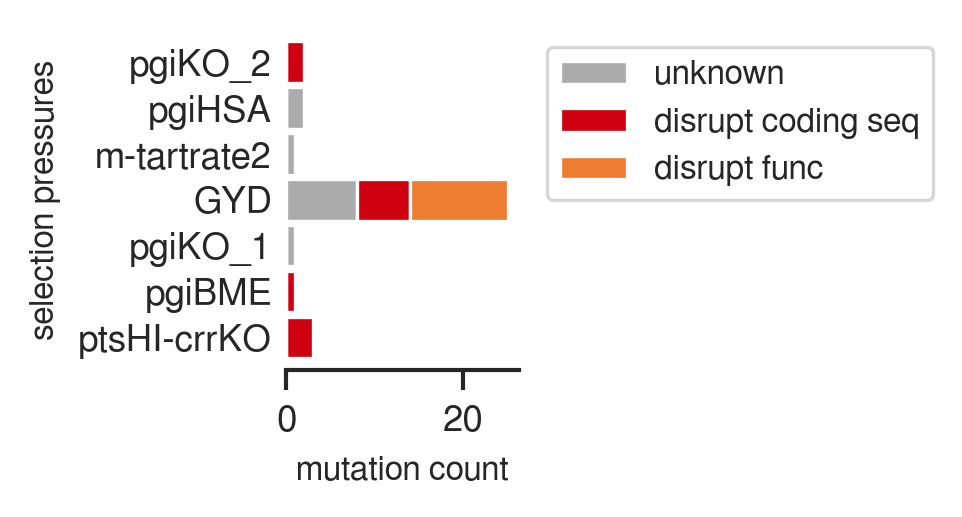

In [30]:
# Copy-paste from get_crp_muts.ipynb

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
sns.set_palette("deep")
sns.set_context("paper")
sns.set_style("ticks")
plt.rcParams['font.sans-serif'] = ["FreeSans"]

df2 = df2.loc[:, (df2 != 0).any(axis=0)]  # Remove columns with just 0s to avoid having their colors in the legend
colors = [mut_effect_color_d[column] for column in df2.columns]  # same order as columns given with input df
ax = df2.plot.barh(
    stacked=True,
    color=colors,
    figsize=(1, 1.5),
    width=0.90,
)

sns.despine(ax=ax, top=True, right=True, bottom=False, left=True)
# ax.get_legend().remove()
ax.tick_params(axis='y', which='major', length=0)
ax.legend(
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    prop={"size": 8},
)

ax.set_title("", fontname="FreeSans")
# ax.axes.get_xaxis().set_ticks([])
ax.set_xlabel('mutation count', fontsize=8)
ax.set_ylabel('selection pressures', fontsize=8)
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.axes.set_title("Title",fontsize=50)

In [31]:
GENE_AA_LENGTH = 848

In [32]:
mut_aa_d = {"truncated":[],
            "unknown effect":[],
            "predicted functional disruption":[],
            "predicted structural disruption":[],
            "predicted functional and structural disruption":[],
           }

for _, m in meta_muts.iterrows():
    if m["coding disrupt"]:
        mut_aa_d["truncated"] += list(range(m["AA range"][0], GENE_AA_LENGTH + 1))
    else:
        mut_effect_type = "unknown effect"
        if m["conservation (SIFT)"]:
            mut_effect_type = "predicted functional disruption"
        
        mut_size = m["mutation size"]  # for MOBs, though in fact unnecessary since they're counted as disruptive.
        if mut_size == 0:
            mut_size = 1
        mut_aa_d[mut_effect_type] += list(range(m["AA range"][0], m["AA range"][0] + mut_size))

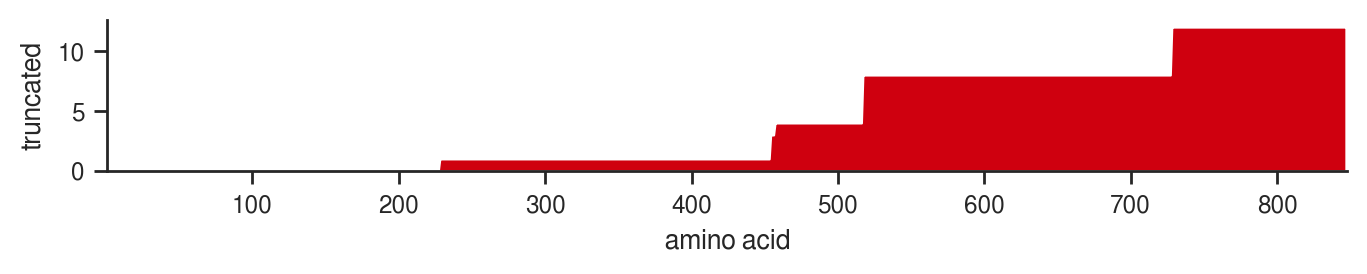

In [33]:
# Could replace this with the area plot to avoid having to manually find good bin sizes
mut_aa_d = {"truncated":[0]*GENE_AA_LENGTH,
            "unknown effect":[0]*GENE_AA_LENGTH,
            "predicted functional disruption":[0]*GENE_AA_LENGTH,
            "predicted structural disruption":[0]*GENE_AA_LENGTH,
            "predicted functional and structural disruption":[0]*GENE_AA_LENGTH,
           }

for _, m in meta_muts.iterrows():
    if m["coding disrupt"]:
        for aa in range(m["AA range"][0], GENE_AA_LENGTH + 1):
            mut_aa_d["truncated"][aa - 1] += 1
            
x = range(0, GENE_AA_LENGTH)
plt.rcParams["figure.dpi"] = 200
plt.figure(figsize=(8,1))
ax = plt.stackplot(x,
              mut_aa_d["truncated"],
              colors=['#CF000F'])
# ax.set_ylabel("Amino acids")
sns.despine(top=True, right=True, bottom=False, left=False)
plt.ylabel('truncated')
plt.xlabel('amino acid')
plt.xlim(1, GENE_AA_LENGTH)
plt.savefig("cyaA_disrupt_coding_AAs.svg")